In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [8]:
data = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\greenAI\day-7\lab-1\solar_power_output(in).csv")
data.head()

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953


In [9]:
X = data[['temperature', 'humidity', 'solar_irradiance', 'wind_speed']]
y = data['solar_power_output']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 29.462345965626305
R² Score: 0.9983255901418433


<h1>Visualization</h1>

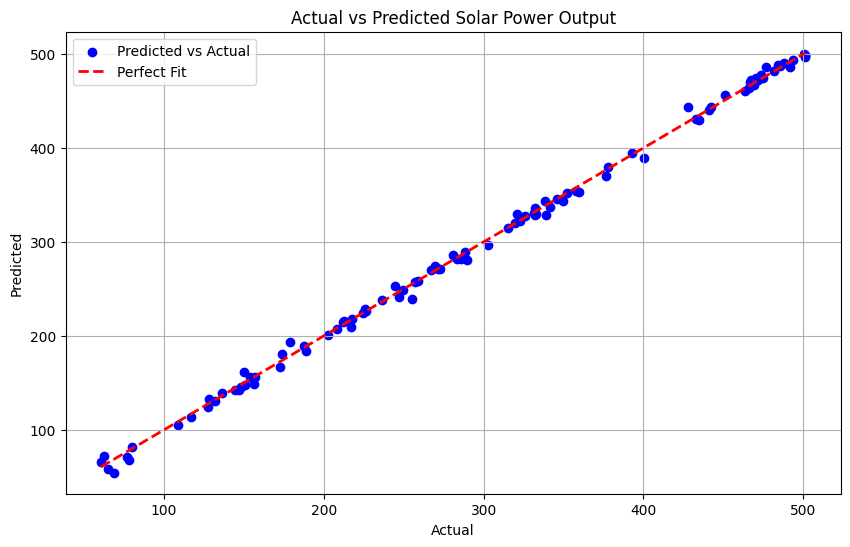

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Solar Power Output')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
joblib.dump(model, r'C:\Users\priya\OneDrive\Desktop\greenAI\day-7\lab-1\solar_power_model.pkl')


['C:\\Users\\priya\\OneDrive\\Desktop\\greenAI\\day-7\\lab-1\\solar_power_model.pkl']

In [ ]:
loaded_model = joblib.load('solar_power_model.pkl')
#prompt the user to input temperature, humidity, solar irradiance, and wind speed
temp = float(input("Enter temperature (°C): "))
humidity = float(input("Enter humidity (%): "))
solar_irradiance = float(input("Enter solar irradiance (W/m²): "))
wind_speed = float(input("Enter wind speed (m/s): "))
# Create a sample input array
sample_input = np.array([[temp, humidity, solar_irradiance, wind_speed]])
predicted_output = loaded_model.predict(sample_input)
print(f"Predicted Solar Power Output: {predicted_output[0]}")
